# **Customer Segmentation Using K-Means and DBSCAN (Mall Dataset)**

## Step 1: Import Required Libraries

We start by importing essential libraries for data handling (Pandas, NumPy), visualization (Matplotlib, Seaborn), and clustering (KMeans, DBSCAN) from Scikit-learn.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score


## Step 2: Load the Dataset

We upload and load the Mall Customers dataset which contains customer demographics and spending behaviors.


In [2]:
# Load dataset (upload or provide path)
from google.colab import files
uploaded = files.upload()

# Read CSV
df = pd.read_csv('Mall_Customers.csv')
df.head()


Saving Mall_Customers.csv to Mall_Customers (1).csv


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Step 3: Data Exploration and Cleaning

We check the dataset's structure, summary statistics, and null values. We also select only the numeric columns (Annual Income and Spending Score) for clustering.


In [3]:
df.info()
df.describe()
df.isnull().sum()

# Rename columns if needed
df.rename(columns={'Annual Income (k$)': 'Income', 'Spending Score (1-100)': 'Spending'}, inplace=True)

# Drop non-numeric columns if focusing on clustering
data = df[['Income', 'Spending']]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## Step 4: Visualize Income vs Spending

We plot a scatter plot to observe the natural distribution of customers based on their income and spending score.


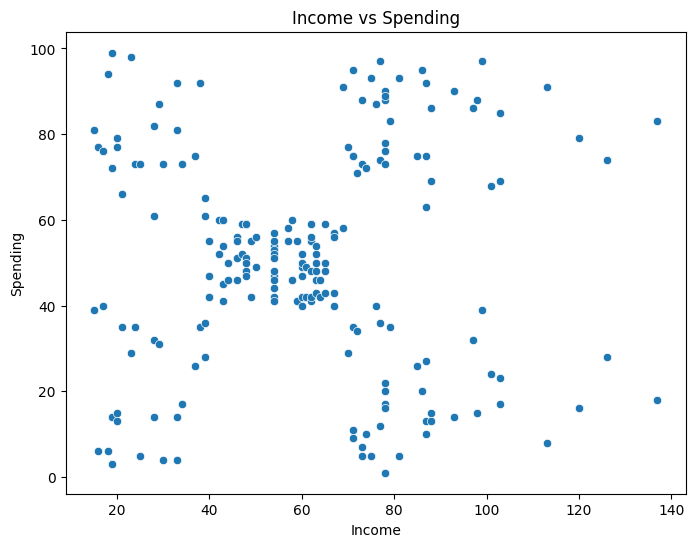

In [4]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Income', y='Spending')
plt.title("Income vs Spending")
plt.show()


## Step 5: Feature Scaling

Clustering algorithms are sensitive to scale. So, we standardize the features using `StandardScaler`.


In [5]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


## Step 6: Determine Optimal Number of Clusters (Elbow Method)

We use the Elbow Method to identify the optimal number of clusters by plotting the Within-Cluster Sum of Squares (inertia) against different values of k.


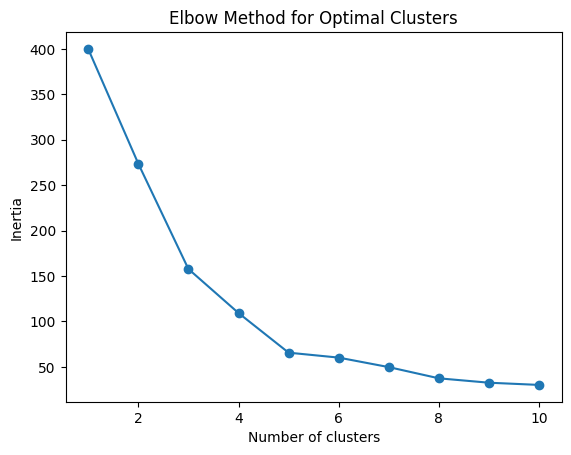

In [6]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()


## Step 7: Apply K-Means Clustering

We apply the K-Means algorithm with the chosen number of clusters (e.g., 5) and assign cluster labels to each customer.


In [7]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)


## Step 8: Visualize the Clusters

We create a scatter plot of the customer clusters to visually interpret the segmentation.


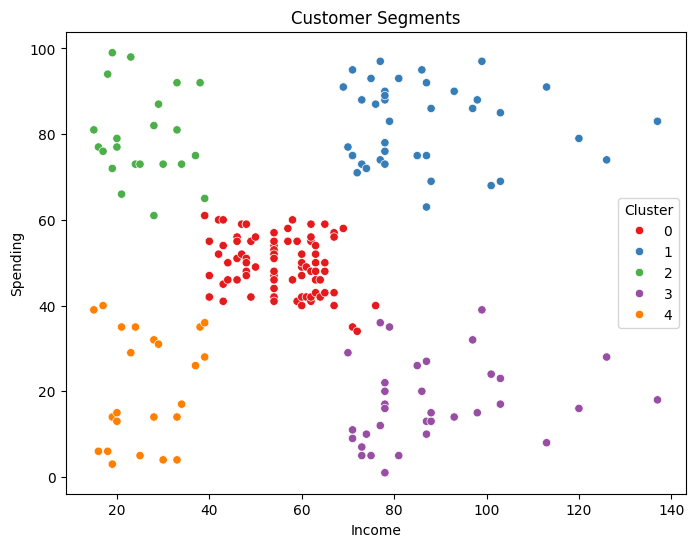

In [8]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Income'], y=df['Spending'], hue=df['Cluster'], palette='Set1')
plt.title("Customer Segments")
plt.show()


## Step 9: Analyze Average Income and Spending by Cluster

We calculate the average income and spending score for each cluster to understand customer group behavior and identify high-value customers.


In [9]:
df.groupby('Cluster')[['Income', 'Spending']].mean().round(2)


,Income,Spending
Cluster,,
0,55.30,49.52
1,86.54,82.13
2,25.73,79.36
3,88.20,17.11
4,26.30,20.91


## Bonus: Try DBSCAN Clustering

We also apply DBSCAN (Density-Based Spatial Clustering) to compare how a density-based method clusters the same data.


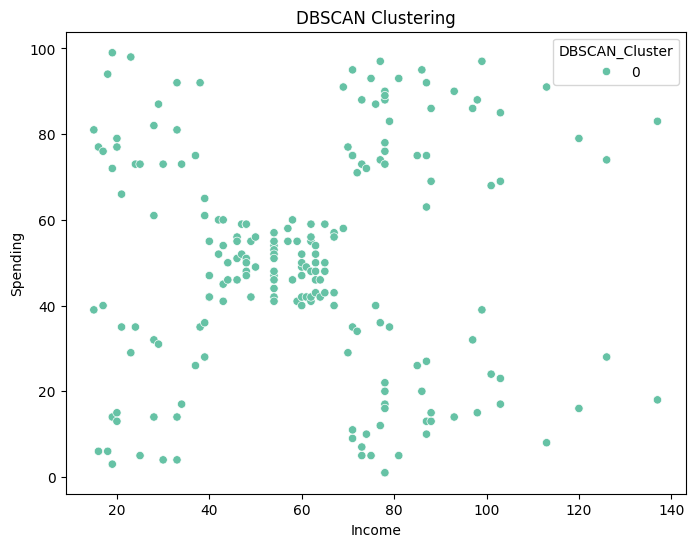

In [10]:
dbscan = DBSCAN(eps=0.7, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(scaled_data)

# Visualize
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Income'], y=df['Spending'], hue=df['DBSCAN_Cluster'], palette='Set2')
plt.title("DBSCAN Clustering")
plt.show()


## Optional: Export Clustered Data

We export the final dataset with cluster labels to a CSV file for further use.


In [11]:
df.to_csv("clustered_customers.csv", index=False)
files.download("clustered_customers.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Conclusion

This notebook demonstrates how unsupervised learning techniques like K-Means and DBSCAN can help segment customers based on their income and spending behavior. Such insights can be used for personalized marketing, customer retention strategies, and product recommendations.

